In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
ns = np.array(map(int, '3 4 5 6 7 8 10 12 14'.split(' ')))

In [3]:
ssk_earn = map(float, '0.925 0.932 0.936 0.936 0.940 0.934 0.927 0.931 0.936'.split(' '))
ngk_earn = map(float, '0.919 0.943 0.944 0.943 0.940 0.940 0.932 0.917 0.923'.split(' '))
wk_earn = 0.925

In [4]:
ssk_acq = map(float, '0.785 0.822 0.867 0.876 0.864 0.852 0.791 0.791 0.774'.split(' '))
ngk_acq = map(float, '0.791 0.873 0.882 0.880 0.870 0.857 0.830 0.806 0.776'.split(' '))
wk_acq = 0.802

In [5]:
ssk_crude = map(float, '0.881 0.905 0.936 0.901 0.872 0.828 0.764 0.709 0.761'.split(' '))
ngk_crude = map(float, '0.907 0.935 0.937 0.908 0.904 0.869 0.811 0.737 0.884'.split(' '))
wk_crude = 0.904

In [6]:
ssk_corn = map(float, '0.665 0.783 0.779 0.749 0.643 0.569 0.582 0.618 0.702'.split(' '))
ngk_corn = map(float, '0.797 0.841 0.847 0.815 0.767 0.706 0.646 0.675 0.813'.split(' '))
wk_corn = 0.752

In [7]:
ssks = np.array((ssk_acq, ssk_corn, ssk_crude, ssk_earn)).mean(axis=0)
ngks = np.array((ngk_acq, ngk_corn, ngk_crude, ngk_earn)).mean(axis=0)
wks = np.array((wk_acq, wk_corn, wk_crude, wk_earn)).mean()

In [72]:
def plot_kernels(ns, ssk, ngk, wk, name='plot.pdf'):
    fig, ax = plt.subplots()
    ax.plot(ns, wk.repeat(len(ns)),label='WK', color='green')
    ax.plot(ns, ngk, label='NGK', color='red')
    ax.plot(ns, ssk, label='SSK', color='blue')
    ax.set_xlabel('Length parameter')
    ax.set_ylabel('F1 Score')
    ax.set_xlim((3, 14))
    ax.set_ylim((0.35, 0.95))
    ax.legend(loc='lower left')
    ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax.get_yticks()])
    plt.savefig(name, bbox_inches='tight')

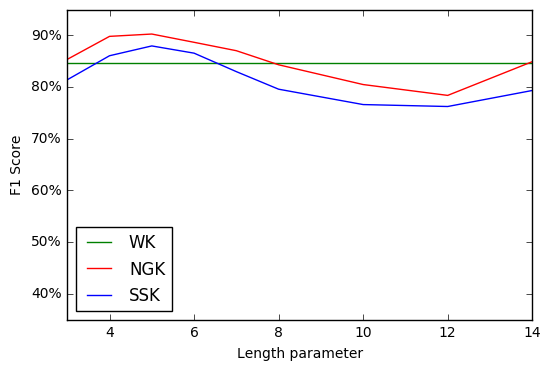

In [73]:
plot_kernels(ns, ssks, ngks, wks, name='theirs.pdf')

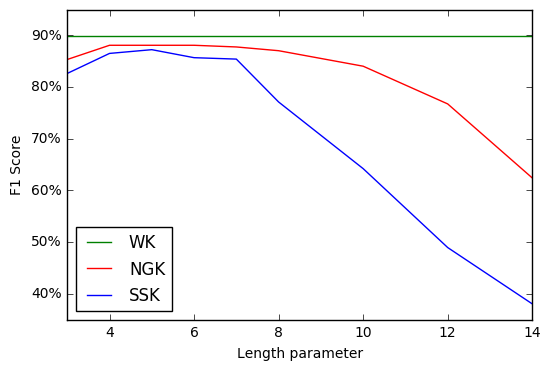

In [74]:
plot_kernels(ns, our_ssk, our_ngk, our_wk, name='ours.pdf')

In [38]:
our_ssk_earn = [0.904, 0.904, 0.919, 0.919, 0.892, 0.861, 0.812, 0.758, 0.730]
our_ngk_earn = [0.904, 0.961, 0.961, 0.961, 0.962, 0.949, 0.921, 0.868, 0.842]
our_wk_earn = 0.961

In [42]:
our_ssk_acq = [0.873, 0.828, 0.842, 0.833, 0.820, 0.770, 0.658, 0.596, 0.556]
our_ngk_acq = [0.807, 0.873, 0.873, 0.873, 0.873, 0.857, 0.833, 0.774, 0.685]
our_wk_acq = 0.868

In [39]:
our_ssk_crude = [0.778, 0.839, 0.839, 0.786, 0.815, 0.786, 0.636, 0.421, 0.235]
our_ngk_crude = [0.813, 0.800, 0.800, 0.800, 0.786, 0.786, 0.857, 0.857, 0.636]
our_wk_crude = 0.875

In [40]:
our_ssk_corn = [0.750, 0.889, 0.889, 0.889, 0.889, 0.667, 0.462, 0.182, 0.000]
our_ngk_corn = [0.889, 0.889, 0.889, 0.889, 0.889, 0.889, 0.750, 0.570, 0.333]
our_wk_corn = 0.889

In [46]:
our_ssk = np.array((our_ssk_earn, our_ssk_acq, our_ssk_crude, our_ssk_corn)).mean(axis=0)
our_ngk = np.array((our_ngk_earn, our_ngk_acq, our_ngk_crude, our_ngk_corn)).mean(axis=0)
our_wk = np.array((our_wk_earn, our_wk_acq, our_wk_crude, our_wk_corn)).mean()

In [51]:
our_wk

0.89824999999999999

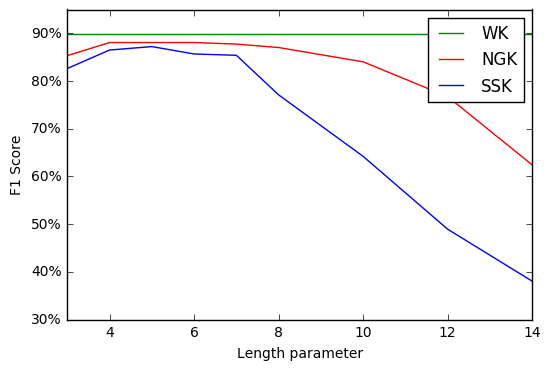

In [56]:
plot_kernels(ns, our_ssk, our_ngk, our_wk)

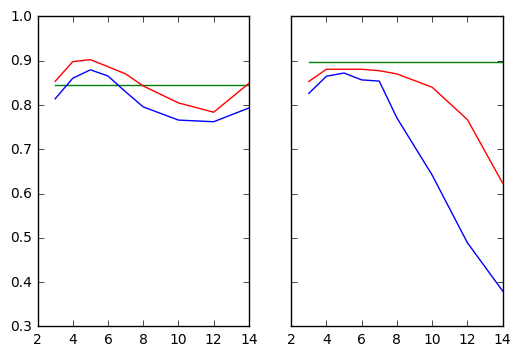

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(ns, wks.repeat(len(ns)),label='WK', color='green')
ax1.plot(ns, ngks, label='NGK', color='red')
ax1.plot(ns, ssks, label='SSK', color='blue')
ax2.plot(ns, our_wk.repeat(len(ns)),label='WK', color='green')
ax2.plot(ns, our_ngk, label='NGK', color='red')
ax2.plot(ns, our_ssk, label='SSK', color='blue')
ax.set_xlabel('Length parameter')
ax.set_ylabel('F1 Score')
ax.set_xlim((3, 14))
ax.set_ylim((None, 0.95))
ax.legend()
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in ax.get_yticks()])
plt.savefig('paper_plot.pdf', bbox_inches='tight')